In [1]:
#Modules for data analysis
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score 
from scipy.stats import chi2_contingency, spearmanr

In [2]:
#Modules for reading and wrting data
import csv

In [3]:
#Modules for plotting and data visulisation
import matplotlib.pyplot as plt
#Not sure if it will be used but imported in case required
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#Create some dictionaries and lists
responses = {}
fidelity_ratings = {}
intelligibility_ratings = {}
fidelity_avg_ratings = {}
within_q_fidelity_avg_ratings = []
fidelity_std_ratings = {}
within_q_fidelity_std_ratings = []
intelligibility_avg_ratings = {}
within_q_intelligibility_avg_ratings = []
intelligibility_std_ratings = {}
within_q_intelligibility_std_ratings = []
complexity_ratings = []

In [5]:
#Use csv to open and read the contents of the file
with open('/content/drive/My Drive/Colab Notebooks/2020_Intern_12__T​RI01_Comp/2020_08-03_2020_Intern_12_TRI01_Comp_Parameter.csv') as csv_file:
    csv_read = csv.reader(csv_file,delimiter=',')
    for i,row in enumerate(csv_read):
        responses[str(i)] = row

In [6]:
#Checking
#print(responses)

In [7]:
#Store fidelity ratings
for i in responses:
    #First two rows are commas and qeustions (not ratings)
    if (int(i) < 2):
        pass
    else:
        fidelity_ratings[str(int(i)-2)] = responses[i][:6]



In [8]:
#Checking
#print(fidelity_ratings)

In [9]:
#Store intelligiblity ratings
for i in responses:
    #First two rows are commas and qeustions (not ratings)
    if (int(i) < 2):
        pass
    else:
        intelligibility_ratings[str(int(i)-2)] = responses[i][6:9]


In [10]:
#Checking
#print(intelligibility_ratings)

In [11]:
#Store complexity ratings
for i in responses:
    #First two rows are commas and qeustions (not ratings)
    if (int(i) < 2):
        pass
    else:
        complexity_ratings.append(int(responses[i][9]))

In [12]:
#Checking
#print(complexity_ratings)

In [13]:
#Compute the mean and standard deviation of the complexity ratings
complexity_mean = np.mean(complexity_ratings)
complexity_std = np.std(complexity_ratings)
print("Overall complexity avg and std dev: %f and %f"  %(complexity_mean,complexity_std))

Overall complexity avg and std dev: 1.067515 and 0.867065


In [14]:
#Currently, ratings are strings which are not very useful to work with - convert to int

for key in fidelity_ratings:
    fidelity_ratings[key] = [int(i) for i in fidelity_ratings[key]]

for key in intelligibility_ratings:
    intelligibility_ratings[key] = [int(i) for i in intelligibility_ratings[key]]


#Checking
#print(fidelity_ratings)
#print(intelligibility_ratings)

In [15]:
#The next section deals with per question averages and standard deviations

In [16]:
#The following code is used to find the avg per question fidelity and intelligibility ratings
for key in fidelity_ratings:
    fidelity_avg_ratings[key] = np.mean(fidelity_ratings[key])

for key in intelligibility_ratings:
    intelligibility_avg_ratings[key] = np.mean(intelligibility_ratings[key])

#Checking
#print(fidelity_avg_ratings)
#print(intelligibility_avg_ratings)

In [17]:
#The following code is used to find the standard deviation per question fidelity and intelligibility ratings
for key in fidelity_ratings:
    fidelity_std_ratings[key] = np.std(fidelity_ratings[key])

for key in intelligibility_ratings:
    intelligibility_std_ratings[key] = np.std(intelligibility_ratings[key])

#Checking
#print(fidelity_std_ratings)
#print(intelligibility_std_ratings)

In [18]:
#Overall mean to match reported ones (they don't match because qeustions mislabelled - easy fix though - change :6 and 6:9 to :3 and 3:9 in which case they do match)
overall_fidelity_avg = np.mean([fidelity_avg_ratings[i] for i in fidelity_avg_ratings])
overall_intelligibility_avg = np.mean([intelligibility_avg_ratings[i] for i in intelligibility_avg_ratings])

print("Overall fidelity and intelligibility avgs: %f and %f"  %(overall_fidelity_avg, overall_intelligibility_avg))

Overall fidelity and intelligibility avgs: 3.022831 and 2.918134


In [19]:
#Overall std to match reported ones (same issue and solution)
overall_fidelity_std = np.mean([fidelity_std_ratings[i] for i in fidelity_std_ratings])
overall_intelligibility_std = np.mean([intelligibility_std_ratings[i] for i in intelligibility_std_ratings])

print("Overall fidelity and intelligibility std devs: %f and %f"  %(overall_fidelity_std, overall_intelligibility_std))

Overall fidelity and intelligibility std devs: 0.376272 and 0.523772


In [20]:
#The next section deals with within question averages and standard deviations (has same issue and solution)

In [21]:
#Within question fidelity and intelligibility avgs - these will match the overall ones
within_q_fidelity_avg_ratings = [np.mean([fidelity_ratings[key][i] for key in fidelity_ratings]) for i in range(len(fidelity_ratings[key]))]
within_q_intelligibility_avg_ratings = [np.mean([intelligibility_ratings[key][i] for key in intelligibility_ratings]) for i in range(len(intelligibility_ratings[key]))]

within_q_fidelity_avg = np.mean(within_q_fidelity_avg_ratings)
within_q_intelligibility_avg = np.mean(within_q_intelligibility_avg_ratings)

print("Question-wise fidelity and intelligibility avgs: %f and %f"  %(within_q_fidelity_avg, within_q_intelligibility_avg))

Question-wise fidelity and intelligibility avgs: 3.022831 and 2.918134


In [22]:
#Within question fidelity and intelligibility std devs- these will not match the overall ones as spread over a 1000 as compared to every 5 entries
#This shows how there is a lower spread in rating by a particular indvidual as compared to over a group

within_q_fidelity_std_ratings = [np.std([fidelity_ratings[key][i] for key in fidelity_ratings]) for i in range(len(fidelity_ratings[key]))]
within_q_intelligibility_std_ratings = [np.std([intelligibility_ratings[key][i] for key in intelligibility_ratings]) for i in range(len(intelligibility_ratings[key]))]

within_q_fidelity_std = np.mean(within_q_fidelity_std_ratings)
within_q_intelligibility_std = np.mean(within_q_intelligibility_std_ratings)

print("Question-wise fidelity and intelligibility std devs: %f and %f"  %(within_q_fidelity_std, within_q_intelligibility_std))

Question-wise fidelity and intelligibility std devs: 1.009337 and 1.014117


In [23]:
#lists for fidelity and intelligibility are created

x1 = list(fidelity_avg_ratings.values())
x2 = list(intelligibility_avg_ratings.values())
y = complexity_ratings

#Checking
#print(x1)
#print(x2)



In [24]:
#as per research, the R^2 and correlation coefficients are found

#firstly, the PMCC is found for the different pairs

pmcc_matrix = np.corrcoef([x1,x2,y])

#Checking
#print(pmcc_matrix)

print("Fidelity and complexity PMCC: %f, intelligibility and complexity PMCC: %f, fidelity and intelligibility PMCC respectively : %f"  %(pmcc_matrix[0][2], pmcc_matrix[1][2], pmcc_matrix[0][1]))

Fidelity and complexity PMCC: -0.813424, intelligibility and complexity PMCC: -0.899279, fidelity and intelligibility PMCC respectively : 0.765625


In [25]:
#next, the cramer's V coefficients are found 

chi_squared_fid_comp = chi2_contingency([x1,y])[0]
#if treated as a table, there are rows equal to the number of responses and 2 columns; so 2 is the minimum
V_fid_comp = np.sqrt(chi_squared_fid_comp/(len(x1)*2))

chi_squared_int_comp = chi2_contingency([x2,y])[0]
V_int_comp = np.sqrt(chi_squared_int_comp/(len(x2)*2))

chi_squared_fid_int = chi2_contingency([x1,x2])[0]
V_fid_int = np.sqrt(chi_squared_fid_int/(len(x2)*2))

print("Fidelity and complexity Cramer's V: %f, intelligibility and complexity Cramer's V: %f, fidelity and intelligibility Cramer's V: %f" %(V_fid_comp,V_int_comp, V_fid_int))

Fidelity and complexity Cramer's V: 0.669214, intelligibility and complexity Cramer's V: 0.665398, fidelity and intelligibility Cramer's V: 0.182492


In [26]:
#lastly, the Spearman's rank coefficients can be calculated

Spearman_fid_comp = spearmanr(x1,y)[0]
Spearman_int_comp = spearmanr(x2,y)[0]
Spearman_fid_int = spearmanr(x1,x2)[0]

print("Fidelity and complexity Spearman's rank coefficient: %f, intelligibility and complexity Spearman's rank coefficient: %f, fidelity and intelligibility Spearman's rank coefficient: %f" %(Spearman_fid_comp,Spearman_int_comp,Spearman_fid_int))

#It is a good sign (check) that the Spearman rank coeffs. and the PMCCs are similar

Fidelity and complexity Spearman's rank coefficient: -0.808203, intelligibility and complexity Spearman's rank coefficient: -0.896263, fidelity and intelligibility Spearman's rank coefficient: 0.759059


In [27]:
#Now, the graphs of the different variables will be plotted 

<Figure size 432x288 with 0 Axes>

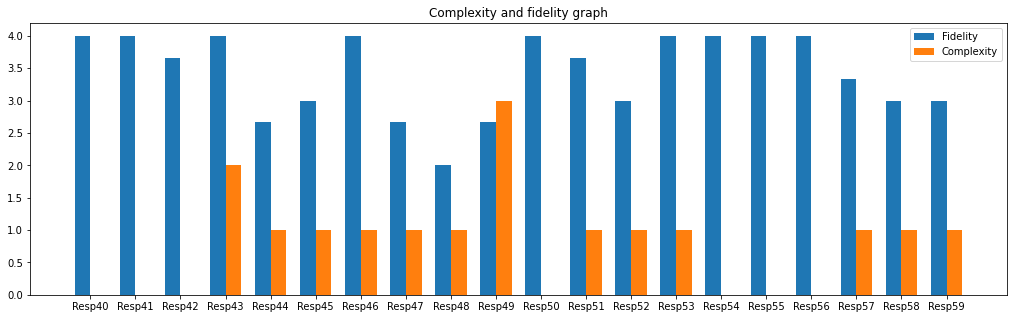

In [28]:
#A scatter or line plot does not provide much information as the data is discrete rather than continuous
#Thus, a sample of the total population is plotted as a bar graph
plt.figure(1)
plt.figure(figsize = (17.5,5))
plt.title("Complexity and fidelity graph")
N = 20
width = 0.35
indexing = np.arange(0,N,1)
plt.bar(indexing, x1[40:60],width, label = "Fidelity")
plt.bar(indexing + width, y[40:60],width, label = "Complexity")
plt.xticks(indexing+width/2,['Resp' + str(i) for i in range(40,60)])
plt.legend(loc = 'best')
plt.show()

<Figure size 432x288 with 0 Axes>

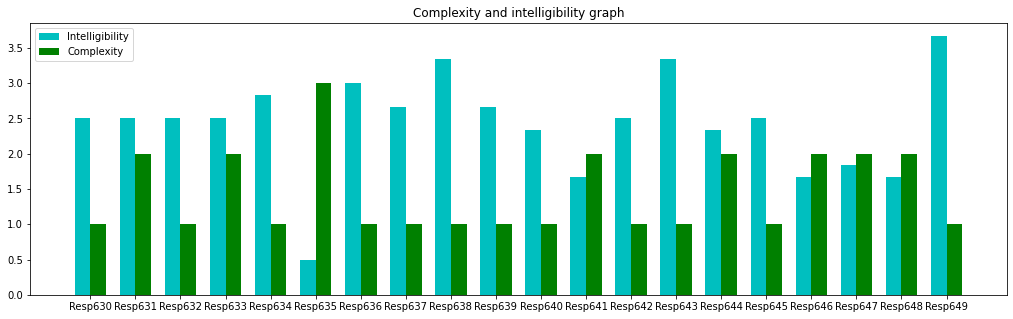

In [29]:
plt.figure(2)
plt.figure(figsize = (17.5,5))
plt.title("Complexity and intelligibility graph")
N = 20
width = 0.35
indexing = np.arange(0,N,1)
plt.bar(indexing, x2[630:650],width, label = "Intelligibility", color = 'c')
plt.bar(indexing + width, y[630:650],width, label = "Complexity", color = 'g')
plt.xticks(indexing+width/2,['Resp' + str(i) for i in range(630,650)])
plt.legend(loc = 'best')
plt.show()

<Figure size 432x288 with 0 Axes>

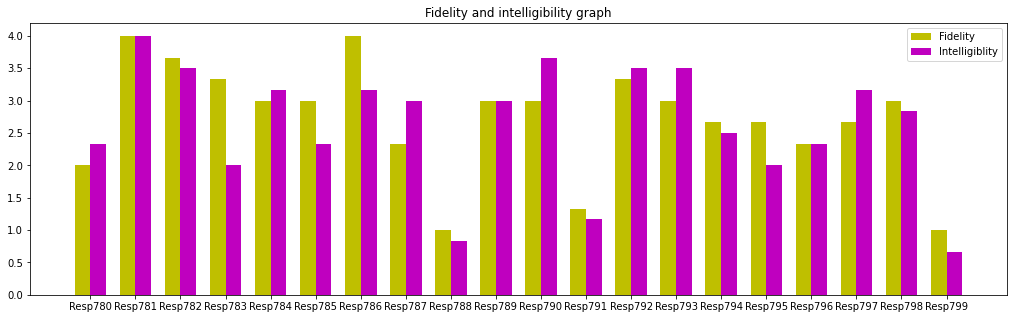

In [30]:
plt.figure(3)
plt.figure(figsize = (17.5,5))
plt.title("Fidelity and intelligibility graph")
N = 20
width = 0.35
indexing = np.arange(0,N,1)
plt.bar(indexing, x1[780:800],width, label = "Fidelity", color = 'y')
plt.bar(indexing + width, x2[780:800],width, label = "Intelligiblity", color = 'm')
plt.xticks(indexing+width/2,['Resp' + str(i) for i in range(780,800)])
plt.legend(loc = 'best')
plt.show()

In [31]:
#Below is the code for a scatter plot - it can be uncommented
#plt.scatter(x1,y)
#plt.xlabel("Fidelity")
#plt.ylabel("Complexity")
#plt.show()

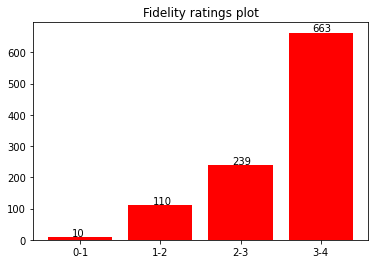

In [32]:
#For total population statistics visualisation
plt.title("Fidelity ratings plot")
dict_of_vals_fid = {"0-1": len([i for i in x1 if (i >= 0 and i < 1)]), "1-2": len([i for i in x1 if (i >= 1 and i < 2)]), "2-3": len([i for i in x1 if (i >= 2 and i < 3)]), "3-4": len([i for i in x1 if (i >= 3 and i <= 4)])}
index = np.arange(0,4,1)
plt.bar(index,list(dict_of_vals_fid.values()), color = 'r')
plt.xticks(index,labels = list(dict_of_vals_fid.keys()))
for no,value in enumerate(list(dict_of_vals_fid.values())):
  plt.text(index[no]-0.1, no+value+2, str(value))

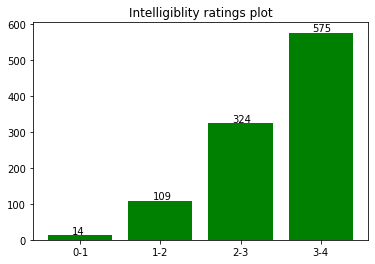

In [33]:
plt.title("Intelligiblity ratings plot")
dict_of_vals_int = {"0-1": len([i for i in x2 if (i >= 0 and i < 1)]), "1-2": len([i for i in x2 if (i >= 1 and i < 2)]), "2-3": len([i for i in x2 if (i >= 2 and i < 3)]), "3-4": len([i for i in x2 if (i >= 3 and i <= 4)])}
index = np.arange(0,4,1)
plt.bar(index,list(dict_of_vals_int.values()), color = 'g')
plt.xticks(index, labels = list(dict_of_vals_int.keys()))
for no,value in enumerate(list(dict_of_vals_int.values())):
  plt.text(index[no]-0.1, no+value+2, str(value))

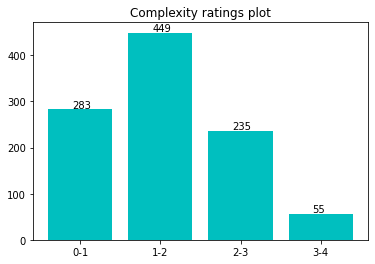

In [34]:
plt.title("Complexity ratings plot")
dict_of_vals_comp = {"0-1": len([i for i in y if (i >= 0 and i < 1)]), "1-2": len([i for i in y if (i >= 1 and i < 2)]), "2-3": len([i for i in y if (i >= 2 and i < 3)]), "3-4": len([i for i in y if (i >= 3 and i <= 4)])}
index = np.arange(0,4,1)
plt.bar(index,list(dict_of_vals_comp.values()), color = 'c')
plt.xticks(index, labels = list(dict_of_vals_comp.keys()))
for no,value in enumerate(list(dict_of_vals_comp.values())):
  plt.text(index[no]-0.1, no+value+2, str(value))